# HW1
### Fatemeh Almodaresi (ID: 117000986)



-----------------------------------------

# Preprocessing:
I've used the R code provided to preprocess the data and get the adjacency matrix.
stored it into the disk and loaded it in this python notebook.
Will put the r code for preprocessing at the end of this notebook.

# How to run
1. Change the root address to the address where you store the input file
2. run the preprocessing piece in R
3. run the cells in this notebook

Note: The code has been written for Python 3

In [213]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import Decimal

In [ ]:
root='/mnt/scratch1/fatemeh/courses/hw1/'

In [93]:
adj = pd.read_csv(root+'data/adjacency.mat', sep=" ")

In [9]:
print(len(adj.columns))
print(len(adj))

2803
2803


In [194]:
(adj.columns.duplicated()).nonzero()

(array([], dtype=int64),)

## 1 - Report quantities:

In [24]:
v = len(adj)
e = adj.sum(1).sum()/2
print("num of vertices : {}".format(v))
print("num of vertices : {}".format(e))
print("average degree : {}".format(adj.sum(1).mean()))
print("density : {}".format(2*e/(v*(v-1))))

num of vertices : 2803
num of vertices : 33634.0
average degree : 23.998572957545488
density : 0.008564801198267483


## 2 - Degree distribution
a) a histogram of degrees

Text(0, 0.5, 'frequency')

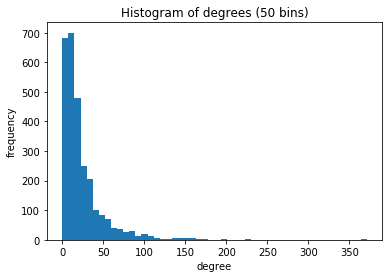

In [35]:
degrees = adj.sum(1)
plt.hist(degrees, bins=50)
plt.title("Histogram of degrees (50 bins)")
plt.xlabel("degree")
plt.ylabel("frequency")

b) a log-log plot of the degree distribution

In [203]:
len(degrees)

2803

Text(0.5, 1.0, 'degree distribution (log-log)')

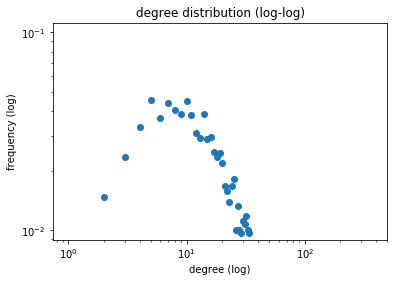

In [217]:
degreeDist = degrees.value_counts()
degreeDist = degreeDist.sort_index()
degreeDist = degreeDist/len(degrees)
ax = plt.gca()
plt.scatter(degreeDist.index+1, degreeDist.values)
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel("degree (log)")
plt.ylabel("frequency (log)")
plt.title("degree distribution (log-log)")

## 3 - Pairwise distance

In [94]:
adjMatrix = adj.values

In [153]:
d = [ [inf for i in range(inf)] for j in range(inf)]
for i in range(inf):
    d[i][i] = 0

In [154]:
# BFS per vertex
for i in range(inf):
    visited = set()
    queue = [(i, 0)]
    while len(queue) > 0:
        nei = queue.pop(0)
        if nei[0] not in visited:
            neinei = adjMatrix[nei[0]].nonzero()[0].tolist()
            queue += list(zip(neinei, [nei[1]+1]*len(neinei)))
            visited.add(nei[0])
            if d[i][nei[0]] > nei[1]:
                d[i][nei[0]] = nei[1]
    print(i, end="\r")

## 4 - Report Distance-related metrics

In [159]:
# a) the average distance
# b) the network diameter
# c) a plot of the distance distribution (simiar to 2.18 a in Barabasi textbook)

In [166]:
distSum=0
distCnt=0
maxDist=0
dists = []
for i in range(inf):
    for j in range(i+1, inf):
        if d[i][j] != inf:
            dists += [d[i][j]]
            distSum += d[i][j]
            distCnt+=1
            if maxDist < d[i][j]:
                maxDist = d[i][j]
distAvg = distSum / distCnt
print("Average distance for connected nodes: {}".format(distAvg))
print("Network Diameter : {}".format(maxDist))

Average distance for connected nodes: 2.7606892830154126
Network Diameter : 6


(array([3.363400e+04, 0.000000e+00, 1.103308e+06, 0.000000e+00,
        2.512994e+06, 0.000000e+00, 2.356930e+05, 0.000000e+00,
        2.236000e+03, 1.000000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

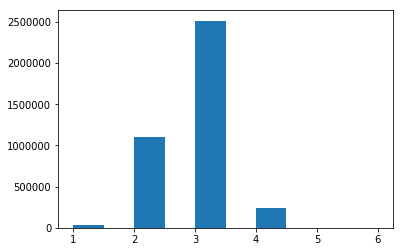

In [169]:
plt.hist(dists)

## 5 - How many components?

In [172]:
visited = set()
components = 0
for i in range(inf):
    if i not in visited:
        components+=1
        queue = [i]
        while len(queue) > 0:
            nei = queue.pop(0)
            if nei not in visited:
                visited.add(nei)
                queue += adjMatrix[nei].nonzero()[0].tolist()
    print(i, end="\r")
print("number of components: {}".format(components))

number of components: 15


## 6 - Cluster Coefficient

In [180]:
cc = []
for i in range(inf):
    cnt = 0
    nei = adjMatrix[i].nonzero()[0].tolist()
    for n1 in nei:
        for n2 in nei:
            if adjMatrix[n1][n2] == 1:
                cnt+=1
    if len(nei) == 0:
        cc += [-1]
    else:
        cc += [float(2 * cnt) / float(len(nei)*(len(nei)+1))]

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Text(0, 0.5, 'degree (log)')

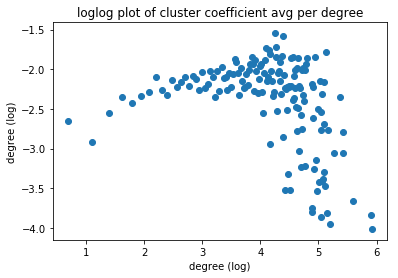

In [215]:
degcc = pd.DataFrame.from_records(list(zip(degrees, cc)))
degcc.columns = ['degree', 'cc']
grp = degcc.groupby('degree').mean().reset_index()
plt.scatter(np.log(grp[grp['cc'] != -1]['degree']), np.log(grp[grp['cc'] != -1]['cc']))
# plt.xscale('log')
# plt.yscale('log')
plt.title('loglog plot of cluster coefficient avg per degree')
plt.xlabel('degree (log)')
plt.ylabel('degree (log)')

# preprocessing code in R:
(Not runnable in this notebook)

In [ ]:
root <- '/mnt/scratch1/fatemeh/courses/hw1/'
setwd(root)

library(readr)
library(tidyverse)
library(MASS)

# read data file
mat <- read_tsv("data/SGA_NxN_clustered.cdt")

amat <- mat %>%
  # extract data rows and columns
  slice(-(1:5)) %>%
  select(starts_with("dma")) %>%
  
  # convert to numeric matrix
  type_convert() %>%
  as.matrix()

# turn into unweighted, undirected adjacency matrix  
amat <- 1 * (abs(amat) > 0.2)

# extract data about arrays (columns)
coldata <- mat %>%
  slice(1:5) %>%
  select(GID, starts_with("dma")) %>%
  slice(2) %>% select(-1) %>%
  gather(dma, orf, starts_with("dma"))

# extract ORF ids for queries (rows)
row_orf <- mat %>%
  slice(-(1:5)) %>%
  pull(ORF)

# match row and column ORF ids
m <- match(row_orf, coldata$orf)
rows_to_use <- !is.na(m)
cols_to_use <- m[rows_to_use]

# subset matrix into ORFs found in both rows and columns
amat <- amat[rows_to_use, cols_to_use]

# set diagonal and missing entries in matrix to 0
diag(amat) <- 0
amat[is.na(amat)] <- 0

# make the adjacency matrix symmetric
amat <- ceiling(0.5 * (amat + t(amat)))
write.matrix(amat, file = "data/adjacency.mat", sep = " ")